0.7481454486436496
-0.2103045126225913


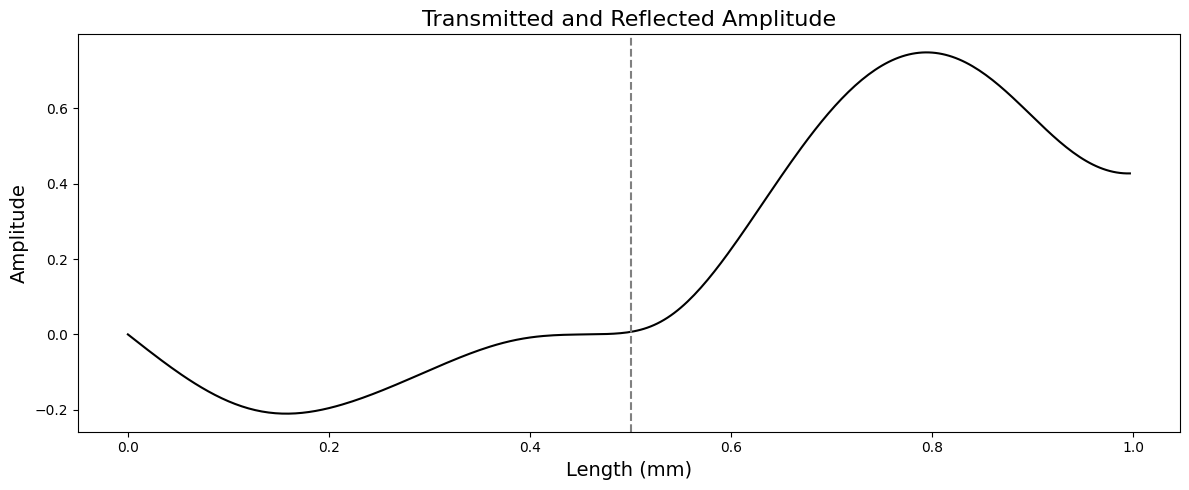

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ruta de los archivos .npy
url = './'
# Inicializar listas para almacenar datos y valores
datos = []
mayores = []
time = []

# Obtener la lista de archivos .npy
archivos = [archivo for archivo in os.listdir(url) if archivo.endswith('.npy')]

# Crear subplots dinámicos según la cantidad de archivos
fig, axs = plt.subplots(len(archivos), 1, figsize=(12, len(archivos) * 5))

# Si solo hay un subplot, convertir axs en una lista para manejarlo uniformemente
if len(archivos) == 1:
    axs = [axs]

# Iterar sobre los archivos
for c, archivo in enumerate(archivos):
    ruta = os.path.join(url, archivo)

    if os.path.isfile(ruta):
        # Cargar los datos del archivo .npy
        data = np.load(ruta)
        ultimo_nodo = data[:, -1]
        datos.append(ultimo_nodo)

        # Obtener el valor máximo y su posición
        valor = ultimo_nodo.max()
        print(valor)
        min = ultimo_nodo.min()
        print(min)
        mayores.append(valor)
        pos = np.where(ultimo_nodo == valor)
        time.append(pos)

        # Generar el tiempo en el eje x
        tiempo = np.arange(len(ultimo_nodo)) /300

        # Graficar en el subplot correspondiente
        axs[c].plot(tiempo, ultimo_nodo, color='black')  # tiempo en el eje x
        axs[c].set_title('Transmitted and Reflected Amplitude', fontsize=16)
        axs[c].set_xlabel('Length (mm)', fontsize=14)
        axs[c].set_ylabel('Amplitude', fontsize=14)
        axs[c].axvline(x=tiempo[len(tiempo)//2], linestyle='--', color='gray', linewidth=1.5)
# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

steps_750_nodes_300_dt_0.001_geo_unit_0%_layer_n_32.npy


TypeError: 'Axes' object is not subscriptable

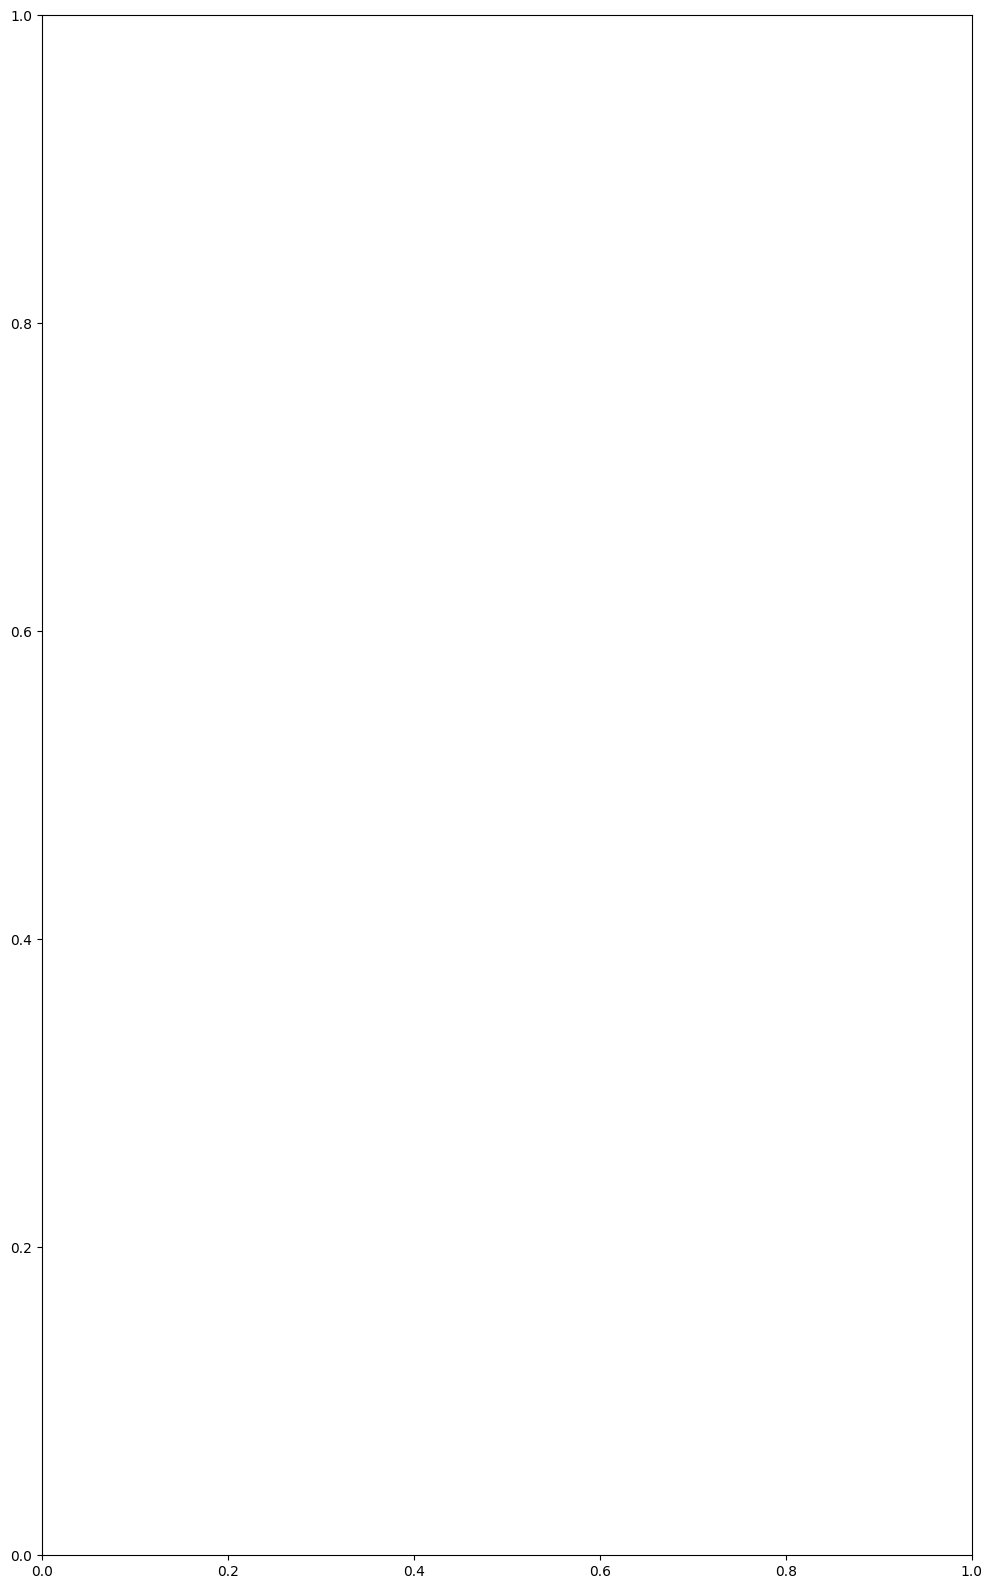

In [4]:
fig, axs = plt.subplots(1,1, figsize=(12,20))

i=0
c=0
datos = []
mayores = []
time = []
new_times = []

for i, archivo in enumerate(os.listdir(url)):

    ruta = os.path.join(url, archivo)
data = np.load(ruta)
if os.path.isfile(ruta) and archivo.endswith('.npy'):
        data = np.load(ruta)
        ultimo_nodo=data[-1,:]
        datos.append(ultimo_nodo)
        valor = ultimo_nodo.max()
        mayores.append(valor)
        pos = np.where(ultimo_nodo == valor)
        time.append(pos)
        print(archivo)
        # Generar el tiempo en el eje x (posiciones multiplicadas por 1e-4)
        tiempo = np.arange(len(ultimo_nodo)) * 1e-3
        
        # Graficar en el subplot correspondiente
        axs[c].plot(tiempo, ultimo_nodo)  # tiempo en el eje x
        axs[c].set_title(f'SOC {c}%')
        axs[c].set_xlabel('Tiempo (s)')
        axs[c].set_ylabel('Valor')

        # Incrementar el contador para subplots
        c += 1

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
import numpy as np 

valores = [tupla[0][0] for tupla in time]
valores = [v*1e-4 for v in valores]
x = np.arange(len(valores))  # Crear los valores de x según la longitud de 'valores'
pendiente, intercepto = np.polyfit(x, valores, 1)  # Pendiente y el intercepto de la línea ajustada
plt.plot(valores, 'o-', color='black', label=f'Pendiente: {pendiente:.4f}')  # Mostrar la pendiente en la leyenda
plt.title("TOF")  # Título del gráfico
plt.xlabel("SOC")  # Etiqueta para el eje X
plt.ylabel("TOF µs")  # Etiqueta para el eje Y
plt.legend()

# Configurar los valores del eje X de 0 a 10, pero etiquetar de 0% a 100%
plt.xticks(ticks=range(0, 11), labels=[f'{i * 10}%' for i in range(0, 11)])

plt.show()  # Mostrar el gráfico
print(f"Pendiente: {pendiente:.4f}")